#Problem Statement
In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. You have to build a Decision Tree Regressor to study the relationship b/w two variables of the ICE CREAM shop and the predict the revenue for the ICE CREAM shop based on the temperature on a particular day.


# Importing the libraries

In [1]:
# For mathematical operation
import numpy as np

# For data manipulation
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt

# For data visualisation
import seaborn as sns

# For data cleaning
import re

# For loading the decision tree regression algorithm
from sklearn.tree import DecisionTreeRegressor

# For splitting the data
from sklearn.model_selection import train_test_split

# Accuracy matrics
from sklearn.metrics import r2_score

# For loading the linear regression algorithm
from sklearn.linear_model import LinearRegression

# Coverting categorical data into numerical
from sklearn.preprocessing import LabelEncoder

# For exporting the model
import pickle

# Importing the dataset


Dataset link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

#  EDA-Exploratory Data Analysis

In [3]:
# Firts five rows of dataframe
df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
# Last five rows of dataframe
df.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
# General information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
# Statistical information about the dataframe
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
# Total no.of null values in each column
df.isna().sum()

Temperature    0
Revenue        0
dtype: int64

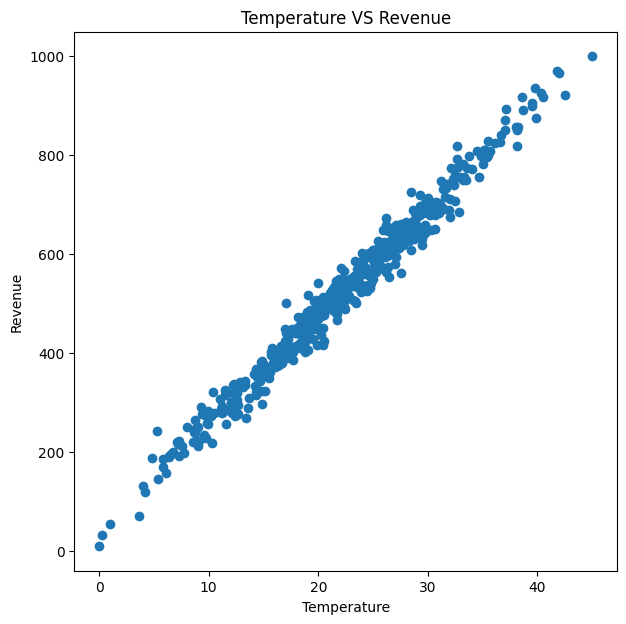

In [8]:
# Relatioship between the Temperature and Revenue
plt.figure(figsize = (7, 7))
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Temperature VS Revenue")
plt.show()

# Observation:

*   Data Strength: 500
*   No. of random variables: 2
*   Columns - Both the columns were having numerical value.
*   The data set has no null values.
*   The Temperature is directly proportional to the Revenue.




In [9]:
# Finding the correlation of columns with each other
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000




*  The correlation between Temperature and Revenue is High Positive Correlation




<Axes: >

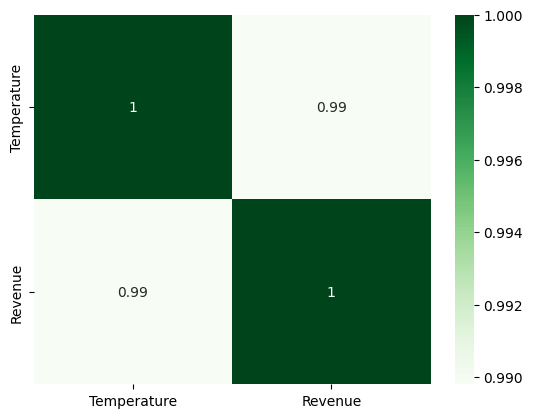

In [10]:
# Plotting the correlation using the heatmap
sns.heatmap(df.corr(), annot=True, cmap = 'Greens')

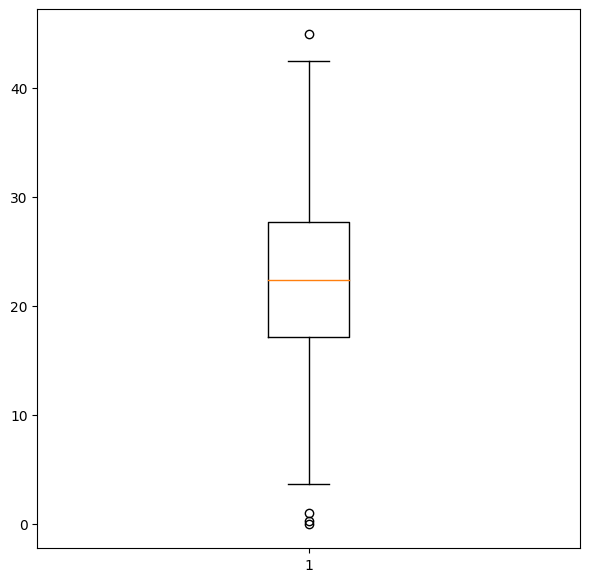

In [11]:
# Checking for outliers using the box plot in Temperature column
plt.figure(figsize = (7,7))
plt.boxplot(df.Temperature)
plt.show()

# Splitting the Dataset

In [12]:
X = df[['Temperature']] # Feature
y = df['Revenue'] # Target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

In [14]:
# Lenght of X_train
len(X_train)

400

In [15]:
# Lenght of X_test
len(X_test)

100

# Selecting the model

In [16]:
Decision = DecisionTreeRegressor()
linear = LinearRegression()

# Fitting the data or Training the model

In [17]:
Decision.fit(X_train,y_train)
linear.fit(X_train,y_train)

LinearRegression()

# Predicting the values

In [18]:
dec_y_pred = Decision.predict(X_test)
lin_y_pred = linear.predict(X_test)

# Model testing

In [19]:
# Predicted value for Decision Tree Regression
dec_y_pred

array([678.7513876, 553.1196514, 473.5681122, 476.7945251, 268.9291794,
       483.4897686, 608.6299921, 321.8482734, 737.8008241, 804.2600255,
       454.1892673, 583.7597813, 583.7597813, 665.6726764, 542.6080704,
       268.9291794, 278.3098441, 396.9356482, 325.9684084, 697.8339862,
       661.4675188, 774.1080813, 540.9775109, 518.2161052, 477.3151879,
       653.9867356, 421.621505 , 682.8085663, 759.3774317, 322.592741 ,
       569.6187562, 581.0740052, 306.0907189, 639.5380115, 603.3246306,
       235.3646433, 603.3246306, 623.5988607, 634.1219776, 409.4028016,
       828.2960767, 702.6236136, 636.298374 , 491.4304998, 621.9692088,
       221.2232906, 516.5486011, 627.6508336, 615.9266502, 660.6322888,
       690.7892959, 118.8121496, 246.7871609, 491.4304998, 809.6720534,
       691.5165411, 374.231135 , 242.5098553, 339.1095829, 374.231135 ,
       809.6720534, 618.1720908, 291.7230401, 550.2785159, 473.5681122,
       591.1733898, 678.7513876, 441.5087331, 965.4930396, 655.4

In [20]:
# Predicted value for Linear Regression
lin_y_pred

array([671.57493777, 546.71559614, 435.16344043, 449.17371259,
       337.69437511, 503.89828151, 580.95738363, 292.19154934,
       726.02739354, 804.0345785 , 451.21080459, 590.56031997,
       590.76700651, 645.50336211, 550.26000561, 335.90088578,
       266.5251535 , 379.77281597, 290.21856022, 713.58081627,
       635.65486659, 764.29222673, 576.1289723 , 529.92520741,
       474.29707015, 662.60315228, 446.80051224, 663.939216  ,
       742.00588631, 349.66434546, 563.32977673, 623.0499448 ,
       316.09043002, 652.74314923, 588.96368832, 250.33014617,
       588.08733087, 630.92430107, 636.32253446, 422.32052748,
       805.86069078, 710.78739397, 664.16315685, 476.0064239 ,
       596.36960272, 228.50312743, 535.04231013, 626.76938729,
       621.28885291, 640.7925088 , 695.71077492, 128.3180186 ,
       231.03336871, 476.5189157 , 797.00663972, 719.02128179,
       391.18436002, 157.43500495, 320.33461145, 390.20495447,
       798.32776339, 622.76819059, 244.9883785 , 522.99

In [21]:
# Creating the DataFrame 
pd.DataFrame({"temperature": X_test.values.flatten(),
              "revenue": y_test,
              "dec res": dec_y_pred,
              "lin res": lin_y_pred})

,temperature,revenue,dec res,lin res
84,29.209715,654.747461,678.751388,671.574938
309,23.412548,542.839106,553.119651,546.715596
33,18.233228,418.137279,473.568112,435.163440
370,18.883719,444.826802,476.794525,449.173713
6,13.707780,308.894518,268.929179,337.694375
...,...,...,...,...
168,32.716381,775.722858,818.135393,747.101481
228,38.146333,850.246982,856.303304,864.051750
143,19.267785,486.474985,452.626317,457.445734
473,18.887162,475.213354,476.794525,449.247862


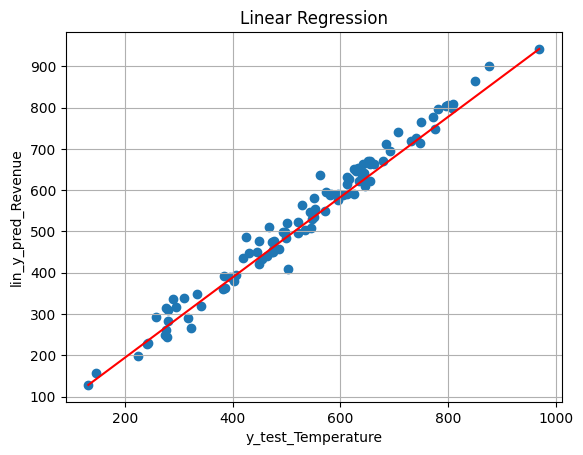

In [22]:
# Relation between y_test and linear regression predicted values
plt.scatter(y_test,lin_y_pred)
plt.plot([min(y_test), max(y_test)], [min(lin_y_pred), max(lin_y_pred)], color = "red")
plt.xlabel("y_test_Temperature")
plt.ylabel("lin_y_pred_Revenue")
plt.title("Linear Regression")
plt.grid()
plt.show()

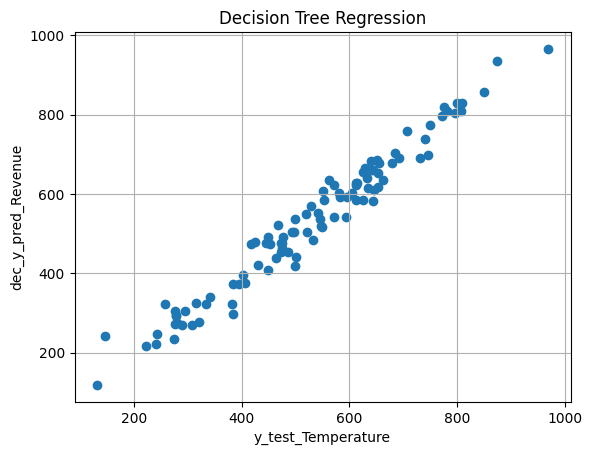

In [23]:
# Relation between y_test and Decision tree regressor predicted values
plt.scatter(y_test,dec_y_pred)
plt.xlabel("y_test_Temperature")
plt.ylabel("dec_y_pred_Revenue")
plt.title("Decision Tree Regression")
plt.grid()
plt.show()

# Performance

In [24]:
f'LINEAR ACCURACY:{r2_score(y_test,lin_y_pred)}'

'LINEAR ACCURACY:0.9787788400913953'

* The accuracy of the Linear Regression is approximately 99%

In [25]:
f'DECISION ACCURACY:{r2_score(y_test,dec_y_pred)}'

'DECISION ACCURACY:0.9602165586032135'

* The accuracy of the Decision Tree Regression is approximately 96%

In [26]:
# Predicting the value based on user input for linear regression
linear.predict([[38]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


860.9000357517673

In [27]:
# Predicting the value based on user input for decision tree regression
Decision.predict([[38]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


857.5266413

# Conclusion:
 
  We can conclude that the Revenue of the shop is more if there is high Temperature.

#Exporting the model

In [28]:
with open('linear.pkl', 'wb') as files:
  pickle.dump(linear, files)

In [29]:
with open('Decision.pkl', 'wb') as files:
  pickle.dump(Decision, files)